In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel("data.xlsx")
df.head()

,calendar_dt,id_employee,useful_calls_fact,useful_chats_fact,avail_calls_fact,avail_chats_fact,avail_chat_call_fact,break_fact,education_fact,additional_fact,...,planning_group_nm,residential_district_nm,residential_city_nm,residential_state_nm,residential_settlement_nm,grafik,cnt_call,dlg_time_call,cnt_chat,dlg_time_chat
0,2024-10-22,b85a5824cc3411e3429bd49054ffcc17,1225,0,2542,0,0,0,27598,0,...,NaN,NaN,г Пермь,Пермский край,NaN,5/2,3.0,497.0,NaN,NaN
1,2024-10-22,611677896b031565a86d510977572ddf,0,0,0,0,0,0,0,0,...,NaN,NaN,г Энгельс,Саратовская обл,NaN,2/2,NaN,NaN,NaN,NaN
2,2024-09-20,3506d80afbdc2f1ddcee2ce65e7d82ee,0,21235,0,372,0,4208,0,1,...,NaN,Нижнекамский р-н,г Нижнекамск,Респ Татарстан,NaN,5/2,NaN,NaN,136.0,31416.0
3,2024-12-25,a497350c6c8542c1e79ae2b83e6c782d,11483,27466,3,130,0,4810,0,1,...,NaN,Катав-Ивановский р-н,г Катав-Ивановск,Челябинская обл,NaN,5/2,35.0,8223.0,78.0,39998.0
4,2024-09-20,34f30cdf1ab7f0195a74ef15963c29a5,1426,30649,184,2119,0,6028,0,2827,...,NaN,NaN,г Ставрополь,Ставропольский край,NaN,2/2,4.0,540.0,258.0,51885.0


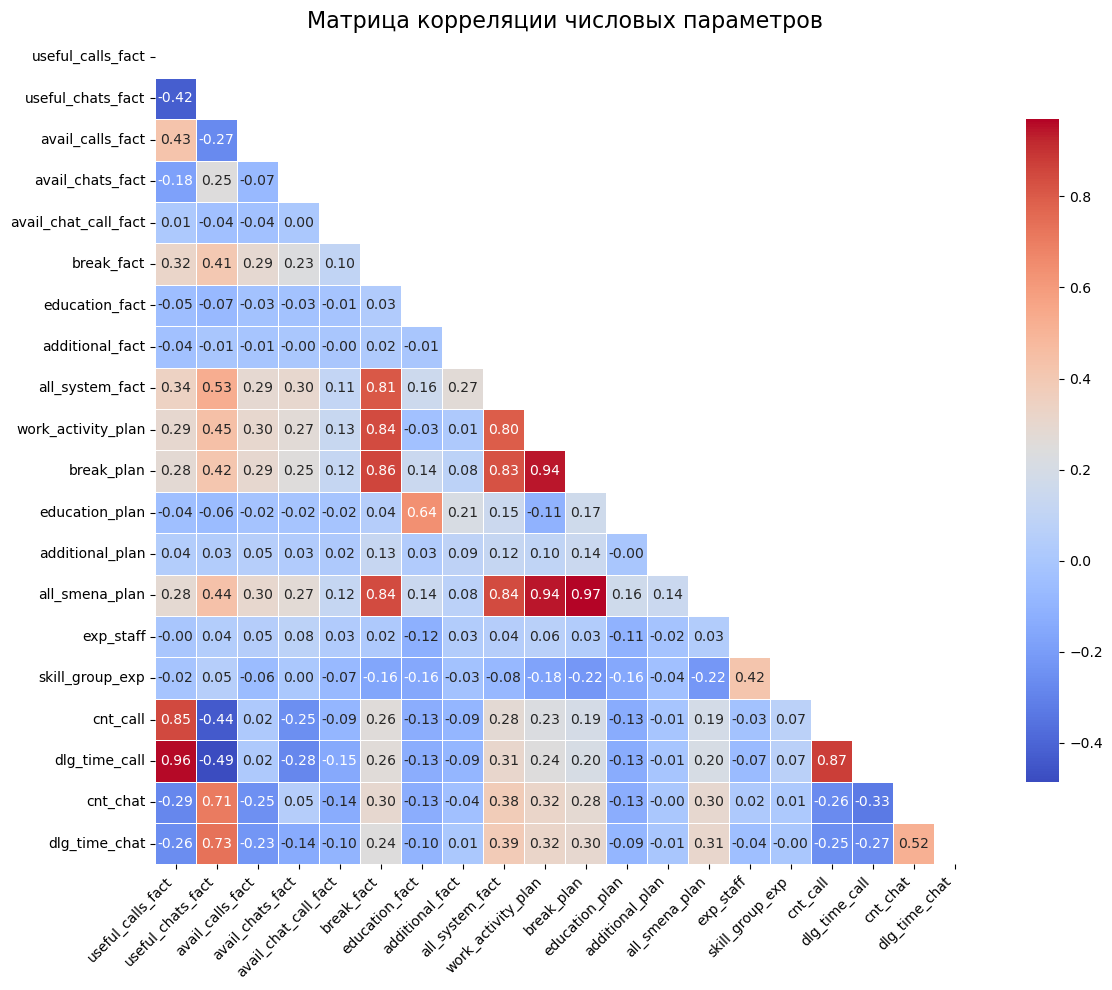

In [4]:
numeric_columns = df.select_dtypes(include=['number'])

# Вычисляем корреляционную матрицу
corr_matrix = numeric_columns.corr()

# Визуализация
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника

# Используем heatmap из seaborn для лучшей визуализации
import seaborn as sns
sns.heatmap(corr_matrix, 
            annot=True,  # Показывать значения
            fmt='.2f',   # Формат значений (2 знака после запятой)
            cmap='coolwarm',  # Цветовая схема
            mask=mask,   # Применяем маску для отображения только нижнего треугольника
            linewidths=0.5,  # Ширина линий между ячейками
            cbar_kws={"shrink": .8})  # Настройка цветовой шкалы

plt.title('Матрица корреляции числовых параметров', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Найдено 15 пар переменных с корреляцией > 0.7


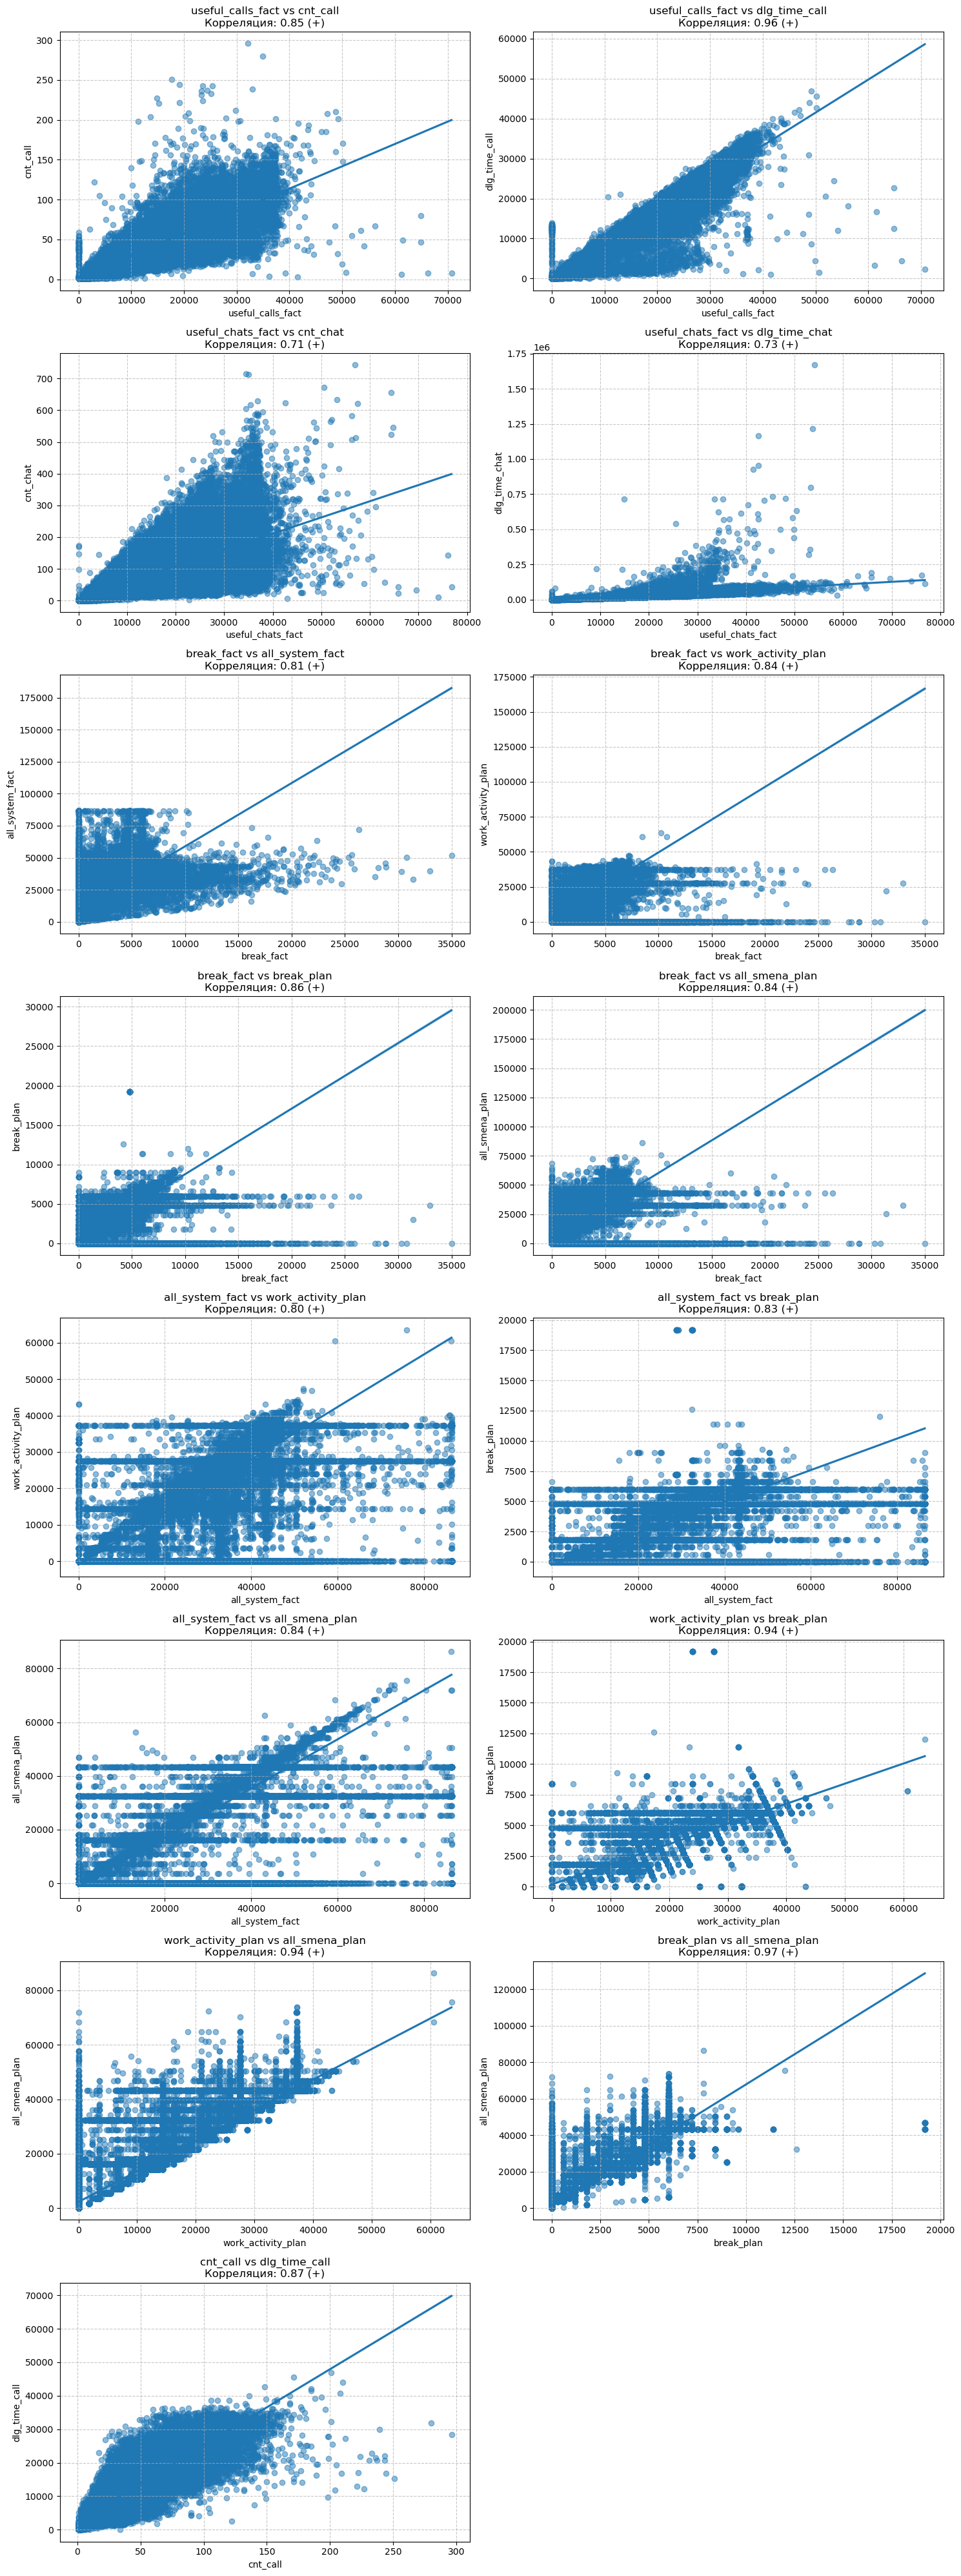

In [5]:
# Предполагается, что у вас уже есть DataFrame с данными
# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=['number'])

# Вычисляем корреляционную матрицу
corr_matrix = numeric_columns.corr()

# Находим пары переменных с корреляцией > 0.7 (по модулю)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # Начинаем с i+1, чтобы избежать дублирования и диагонали
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Выводим количество найденных пар
print(f"Найдено {len(high_corr_pairs)} пар переменных с корреляцией > 0.7")

# Строим графики для каждой пары с высокой корреляцией
if high_corr_pairs:
    # Определяем количество строк и столбцов для сетки графиков
    n_plots = len(high_corr_pairs)
    n_cols = 2  # Можно изменить по желанию
    n_rows = (n_plots + n_cols - 1) // n_cols  # Округление вверх
    
    # Создаем фигуру с подграфиками
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_plots == 1:
        axes = np.array([axes])  # Преобразуем в массив, если только один график
    axes = axes.flatten()  # Преобразуем в одномерный массив для удобства
    
    # Строим графики
    for i, (var1, var2, corr_value) in enumerate(high_corr_pairs):
        if i < len(axes):
            ax = axes[i]
            
            # Строим scatter plot
            sns.regplot(x=var1, y=var2, data=numeric_columns, ax=ax, scatter_kws={'alpha':0.5})
            
            # Добавляем заголовок с информацией о корреляции
            corr_sign = "+" if corr_value > 0 else "-"
            ax.set_title(f"{var1} vs {var2}\nКорреляция: {corr_value:.2f} ({corr_sign})", fontsize=12)
            
            # Улучшаем внешний вид
            ax.grid(True, linestyle='--', alpha=0.7)
    
    # Скрываем пустые подграфики, если они есть
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("Нет пар переменных с корреляцией выше 0.7")


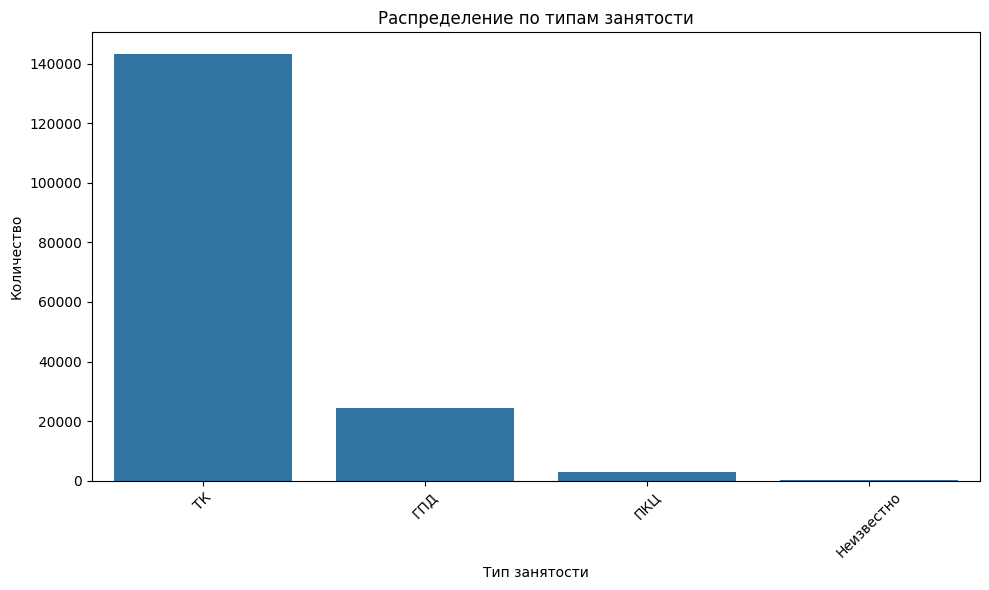

In [27]:
# Заполняем пропущенные значения строкой "Неизвестно"
df["emp_type"].fillna("Неизвестно", inplace=True)
# Используем countplot вместо barplot - он автоматически считает количество
plt.figure(figsize=(10, 6))
sns.countplot(x="emp_type", data=df)
plt.title("Распределение по типам занятости")
plt.xlabel("Тип занятости")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Статистика до очистки:
Минимум: 0.0, Максимум: inf
Среднее: inf, Медиана: 0.9601267281105991
Количество записей: 170774
Количество пропущенных значений: 30130

Границы для определения выбросов:
Нижняя граница: -4.853368055555556
Верхняя граница: 10.1296875

Статистика после очистки:
Минимум: 0.0, Максимум: 1.0
Среднее: 0.7498920101890728, Медиана: 0.828695652173913
Количество записей: 87417
Удалено записей: 83357


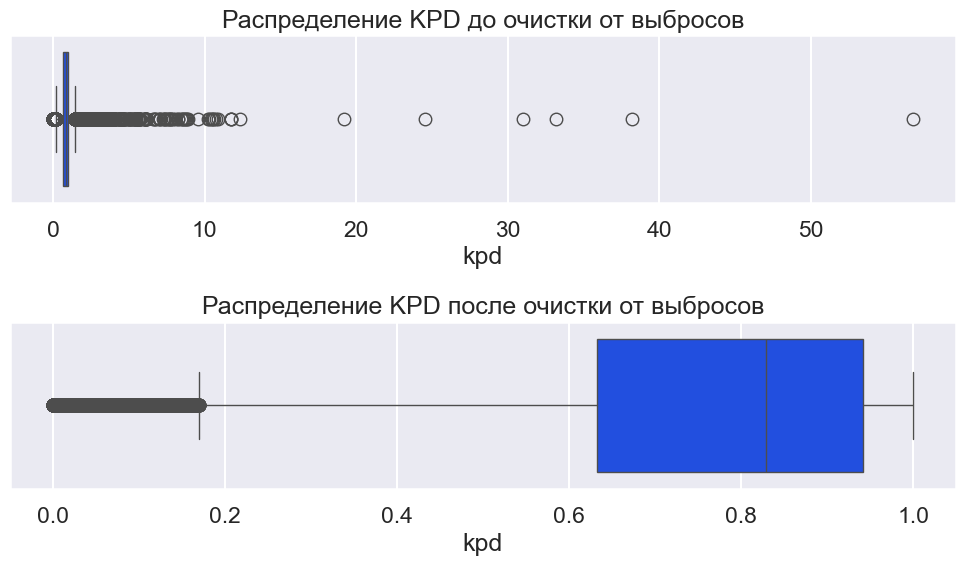

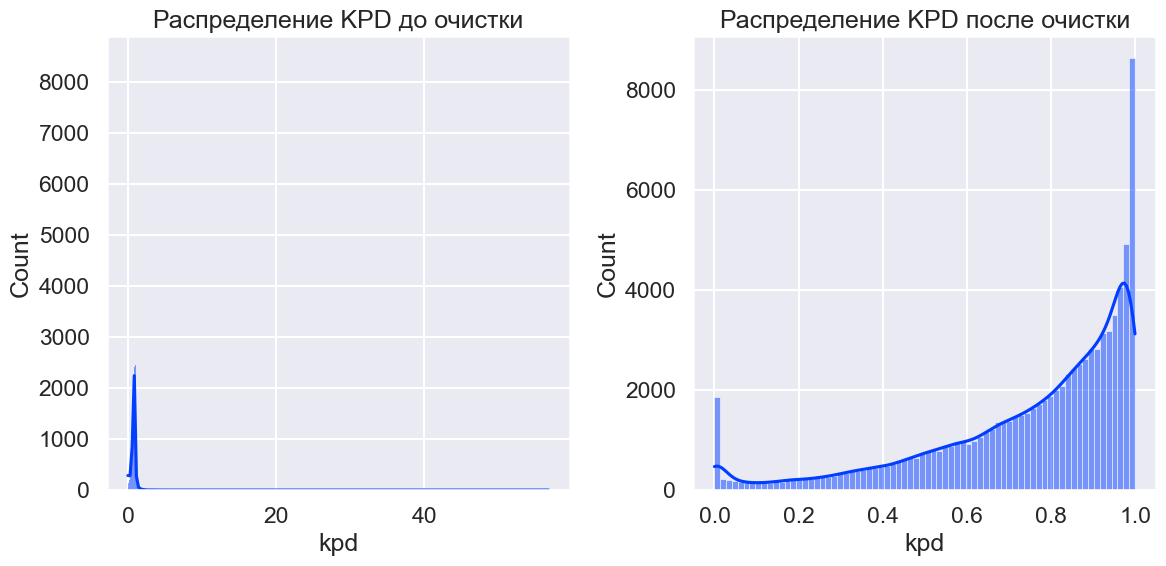

In [ ]:
df["kpd"] = (df["useful_calls_fact"]+ df["useful_chats_fact"]) / (df["work_activity_plan"])


# Сначала посмотрим на распределение значений до очистки
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x=df["kpd"])
plt.title("Распределение KPD до очистки от выбросов")

# Вычисляем квартили и IQR
Q1 = df["kpd"].quantile(0.25)
Q3 = df["kpd"].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Статистика до очистки:")
print(f"Минимум: {df['kpd'].min()}, Максимум: {df['kpd'].max()}")
print(f"Среднее: {df['kpd'].mean()}, Медиана: {df['kpd'].median()}")
print(f"Количество записей: {len(df['kpd'])}")
print(f"Количество пропущенных значений: {df['kpd'].isna().sum()}")
print("\nГраницы для определения выбросов:")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

# Создаем новый DataFrame без выбросов
df_cleaned = df.copy()
df_cleaned = df_cleaned[(df_cleaned["kpd"] >= 0) & (df_cleaned["kpd"] <= 1)]

# Альтернативно, можно заменить выбросы на границы
# df_cleaned["kpd"] = df["kpd"].clip(lower=lower_bound, upper=upper_bound)

print(f"\nСтатистика после очистки:")
print(f"Минимум: {df_cleaned['kpd'].min()}, Максимум: {df_cleaned['kpd'].max()}")
print(f"Среднее: {df_cleaned['kpd'].mean()}, Медиана: {df_cleaned['kpd'].median()}")
print(f"Количество записей: {len(df_cleaned['kpd'])}")
print(f"Удалено записей: {len(df) - len(df_cleaned)}")

# Визуализируем результат после очистки
plt.subplot(2, 1, 2)
sns.boxplot(x=df_cleaned["kpd"])
plt.title("Распределение KPD после очистки от выбросов")
plt.tight_layout()
plt.show()

# Гистограмма до и после очистки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["kpd"], kde=True)
plt.title("Распределение KPD до очистки")

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned["kpd"], kde=True)
plt.title("Распределение KPD после очистки")
plt.tight_layout()
plt.show()


Тип данных в столбце 'grafik': object
Уникальные значения: ['5/2' '2/2' '4' 'ГПД' 'Ночь' 'Нет графика' 'ПКЦ' '35 часов' '36 часов']
Количество пропущенных значений: 0


C:\Users\Админ\AppData\Local\Temp\ipykernel_11064\2067518458.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["grafik"].fillna("Не указано", inplace=True)


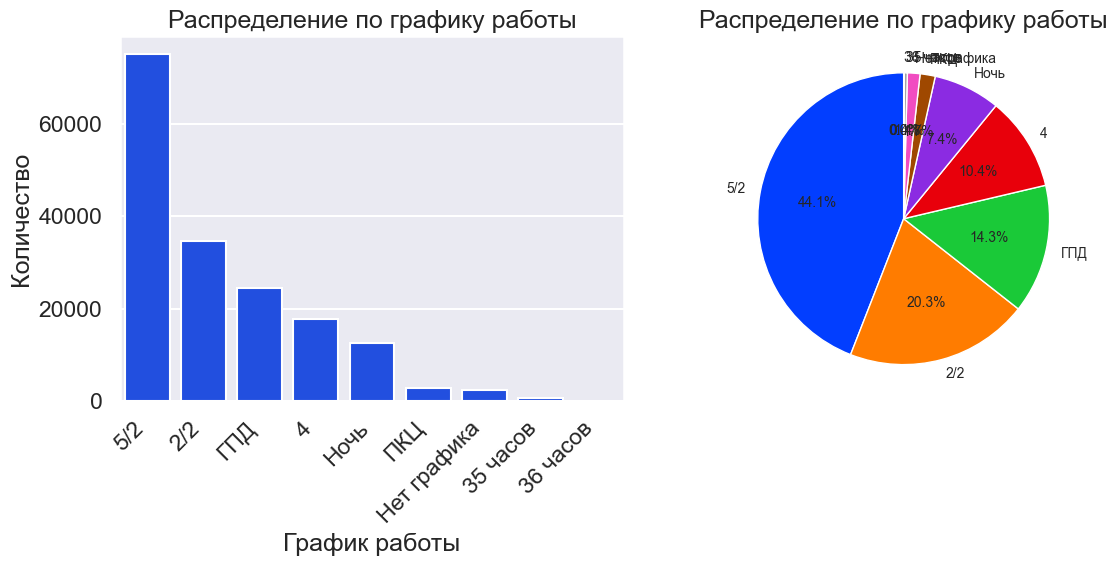

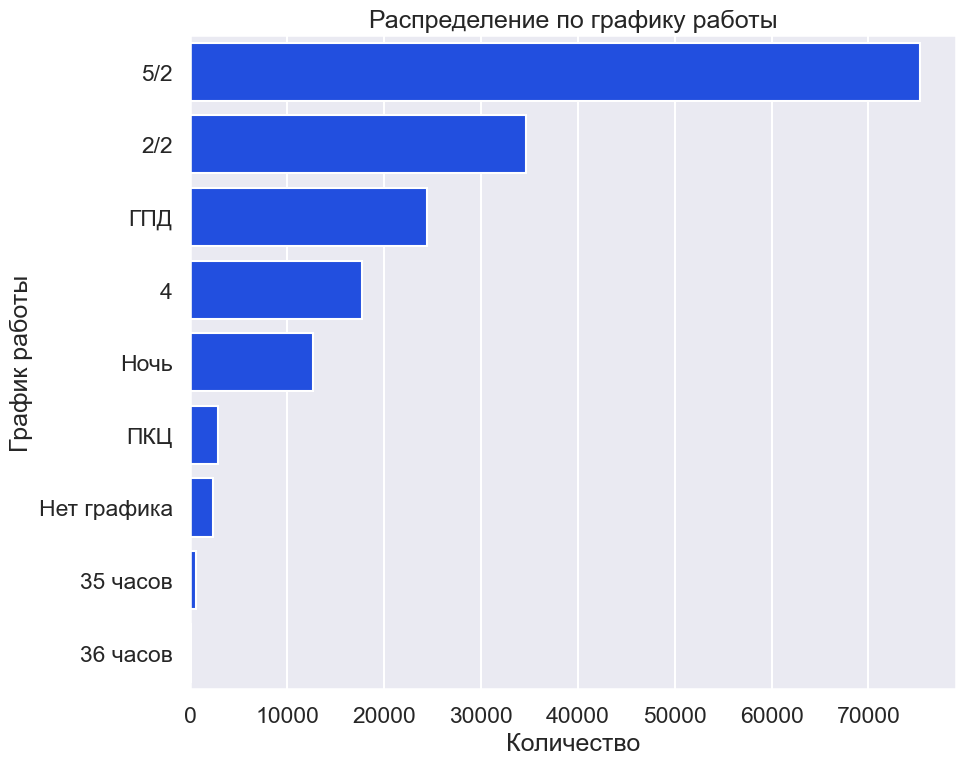

In [41]:
# Проверяем тип данных и уникальные значения
print(f"Тип данных в столбце 'grafik': {df['grafik'].dtype}")
print(f"Уникальные значения: {df['grafik'].unique()}")
print(f"Количество пропущенных значений: {df['grafik'].isna().sum()}")

# Заполняем пропущенные значения, если они есть
df["grafik"].fillna("Не указано", inplace=True)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))

# Вариант 1: Столбчатая диаграмма
plt.subplot(1, 2, 1)
counts = df["grafik"].value_counts().sort_values(ascending=False)
sns.barplot(x=counts.index, y=counts.values)
plt.title("Распределение по графику работы")
plt.xlabel("График работы")
plt.ylabel("Количество")
plt.xticks(rotation=45, ha='right')

# Вариант 2: Круговая диаграмма
plt.subplot(1, 2, 2)
df["grafik"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                     wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                     textprops={'fontsize': 10})
plt.title("Распределение по графику работы")
plt.ylabel("")  # Убираем метку оси Y для круговой диаграммы

plt.tight_layout()
plt.show()

# Дополнительно: Горизонтальная столбчатая диаграмма для лучшей читаемости длинных названий
plt.figure(figsize=(10, 8))
sns.countplot(y="grafik", data=df, order=df["grafik"].value_counts().index)
plt.title("Распределение по графику работы")
plt.xlabel("Количество")
plt.ylabel("График работы")
plt.tight_layout()
plt.show()


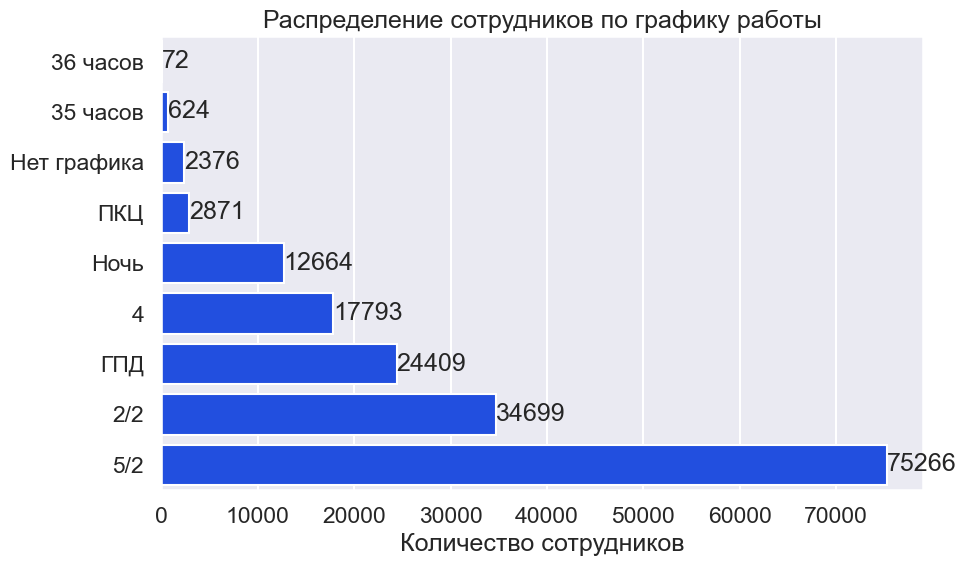

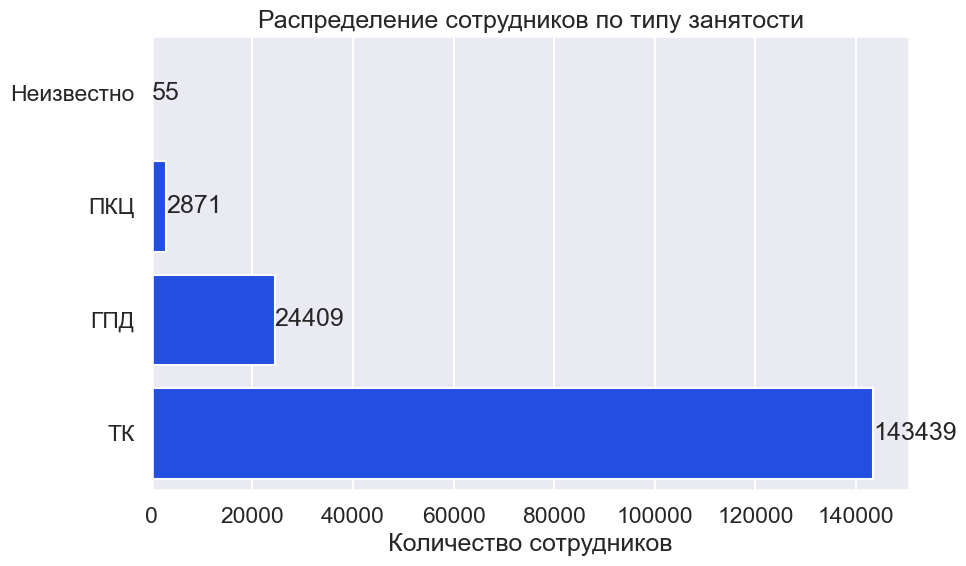

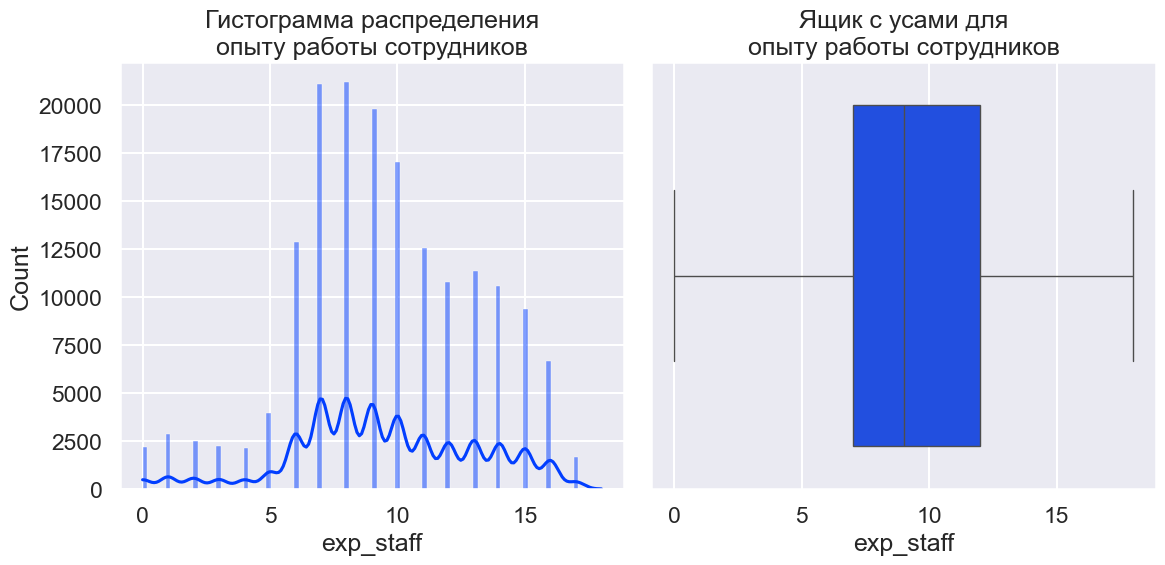

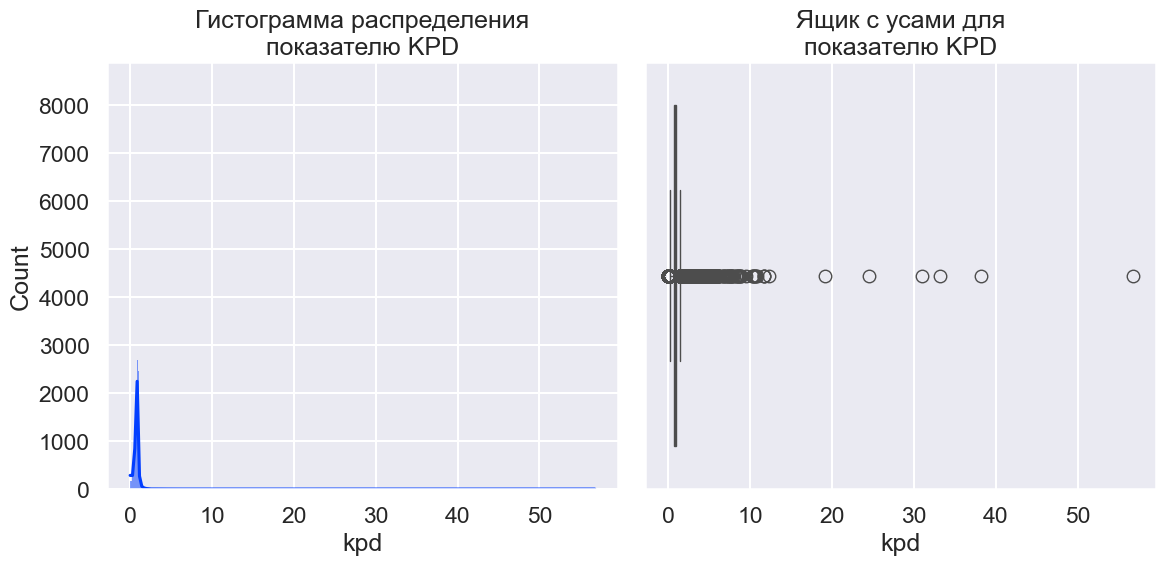

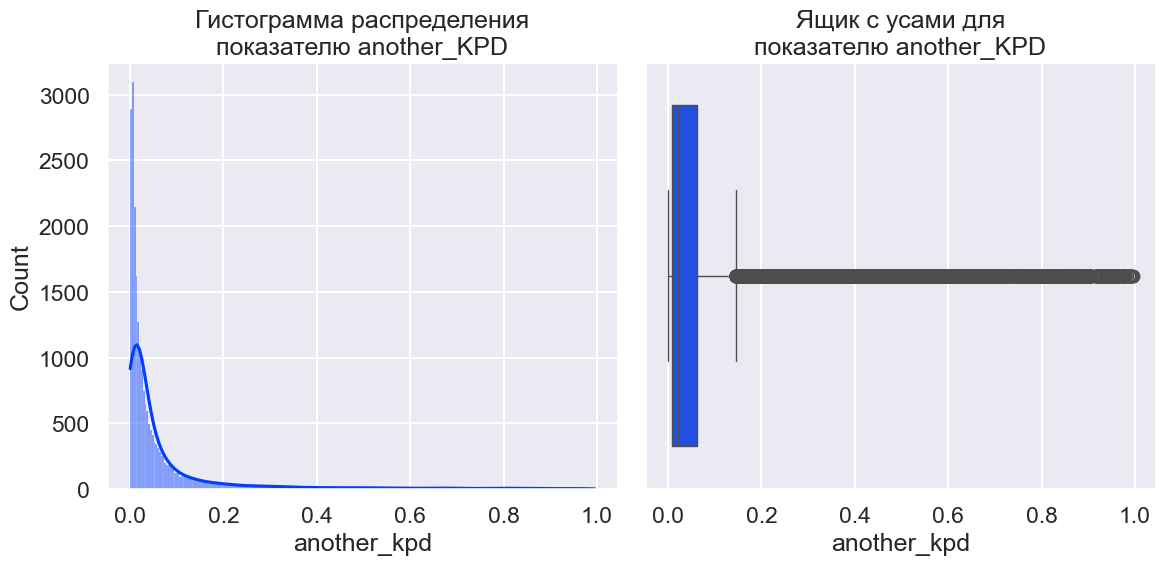

In [59]:
# Создаем функцию для построения графиков распределения категориальных переменных
def plot_categorical_distribution(df, column_name, title=None, figsize=(10, 6), limit=10):
    if column_name not in df.columns:
        print(f"Столбец '{column_name}' не найден в DataFrame")
        return
    
    # Заполняем пропущенные значения
    temp_df = df.copy()
    temp_df[column_name] = temp_df[column_name].fillna("Не указано")
    
    # Получаем топ-N категорий (если их много)
    value_counts = temp_df[column_name].value_counts()
    if len(value_counts) > limit:
        top_categories = value_counts.nlargest(limit-1).index.tolist()
        temp_df[column_name] = temp_df[column_name].apply(
            lambda x: x if x in top_categories else "Другие")
    
    # Строим график
    plt.figure(figsize=figsize)
    
    # Горизонтальная столбчатая диаграмма
    counts = temp_df[column_name].value_counts().sort_values(ascending=True)
    ax = sns.barplot(y=counts.index, x=counts.values)
    
    # Добавляем значения на столбцы
    for i, v in enumerate(counts.values):
        ax.text(v + 0.1, i, str(v), va='center')
    
    # Настраиваем график
    plt.title(title or f"Распределение сотрудников по {column_name}")
    plt.xlabel("Количество сотрудников")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# Создаем функцию для построения графиков распределения числовых переменных
def plot_numerical_distribution(df, column_name, title=None, figsize=(12, 6)):
    if column_name not in df.columns:
        print(f"Столбец '{column_name}' не найден в DataFrame")
        return
    
    # Проверяем тип данных
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Столбец '{column_name}' не является числовым")
        return
    
    # Строим график
    plt.figure(figsize=figsize)
    
    # Гистограмма с кривой плотности
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name].dropna(), kde=True)
    plt.title(f"Гистограмма распределения\n{title or column_name}")
    
    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column_name].dropna())
    plt.title(f"Ящик с усами для\n{title or column_name}")
    
    plt.tight_layout()
    plt.show()

# Предполагаемые столбцы для анализа распределения сотрудников
# Замените их на реальные столбцы из вашего DataFrame

# 1. Распределение по должностям (если есть столбец с должностями)
if 'position' in df.columns:
    plot_categorical_distribution(df, 'position', "Распределение сотрудников по должностям")
elif 'job_title' in df.columns:
    plot_categorical_distribution(df, 'job_title', "Распределение сотрудников по должностям")
elif 'title' in df.columns:
    plot_categorical_distribution(df, 'title', "Распределение сотрудников по должностям")

# 2. Распределение по отделам (если есть столбец с отделами)
if 'department' in df.columns:
    plot_categorical_distribution(df, 'department', "Распределение сотрудников по отделам")
elif 'dept' in df.columns:
    plot_categorical_distribution(df, 'dept', "Распределение сотрудников по отделам")

# 3. Распределение по графику работы
if 'grafik' in df.columns:
    plot_categorical_distribution(df, 'grafik', "Распределение сотрудников по графику работы")

# 4. Распределение по типу занятости
if 'emp_type' in df.columns:
    plot_categorical_distribution(df, 'emp_type', "Распределение сотрудников по типу занятости")

# 5. Распределение по опыту работы
if 'exp_staff' in df.columns:
    plot_numerical_distribution(df, 'exp_staff', "опыту работы сотрудников")
elif 'experience' in df.columns:
    plot_numerical_distribution(df, 'experience', "опыту работы сотрудников")

# 6. Распределение по возрасту (если есть)
if 'age' in df.columns:
    plot_numerical_distribution(df, 'age', "возрасту сотрудников")

# 7. Распределение по KPD
if 'kpd' in df.columns:
    plot_numerical_distribution(df, 'kpd', "показателю KPD")
if 'another_kpd' in df.columns:
    plot_numerical_distribution(df, 'another_kpd', "показателю another_KPD")

# 8. Круговая диаграмма для небольшого числа категорий (например, пол)
if 'gender' in df.columns:
    plt.figure(figsize=(8, 8))
    df['gender'].fillna('Не указано').value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    plt.title("Распределение сотрудников по полу")
    plt.ylabel("")
    plt.show()


Столбец 'training_time' не найден в DataFrame.
Доступные столбцы: ['calendar_dt', 'id_employee', 'useful_calls_fact', 'useful_chats_fact', 'avail_calls_fact', 'avail_chats_fact', 'avail_chat_call_fact', 'break_fact', 'education_fact', 'additional_fact', 'all_system_fact', 'work_activity_plan', 'break_plan', 'education_plan', 'additional_plan', 'all_smena_plan', 'business_line', 'napravlenie', 'grid_group', 'skill_group', 'emp_type', 'hire_dt', 'exp_staff', 'gender_desc', 'skill_group_exp', 'planning_group_nm', 'residential_district_nm', 'residential_city_nm', 'residential_state_nm', 'residential_settlement_nm', 'grafik', 'cnt_call', 'dlg_time_call', 'cnt_chat', 'dlg_time_chat', 'kpd', 'another_kpd']
Возможно, вы имели в виду один из этих столбцов: ['education_fact', 'education_plan']
Используем столбец 'education_fact' для времени обучения
Количество строк для построения графика: 170719


C:\Users\Админ\AppData\Local\Temp\ipykernel_11064\3039146434.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['exp_category'] = plot_df['exp_staff'].round().astype(int)


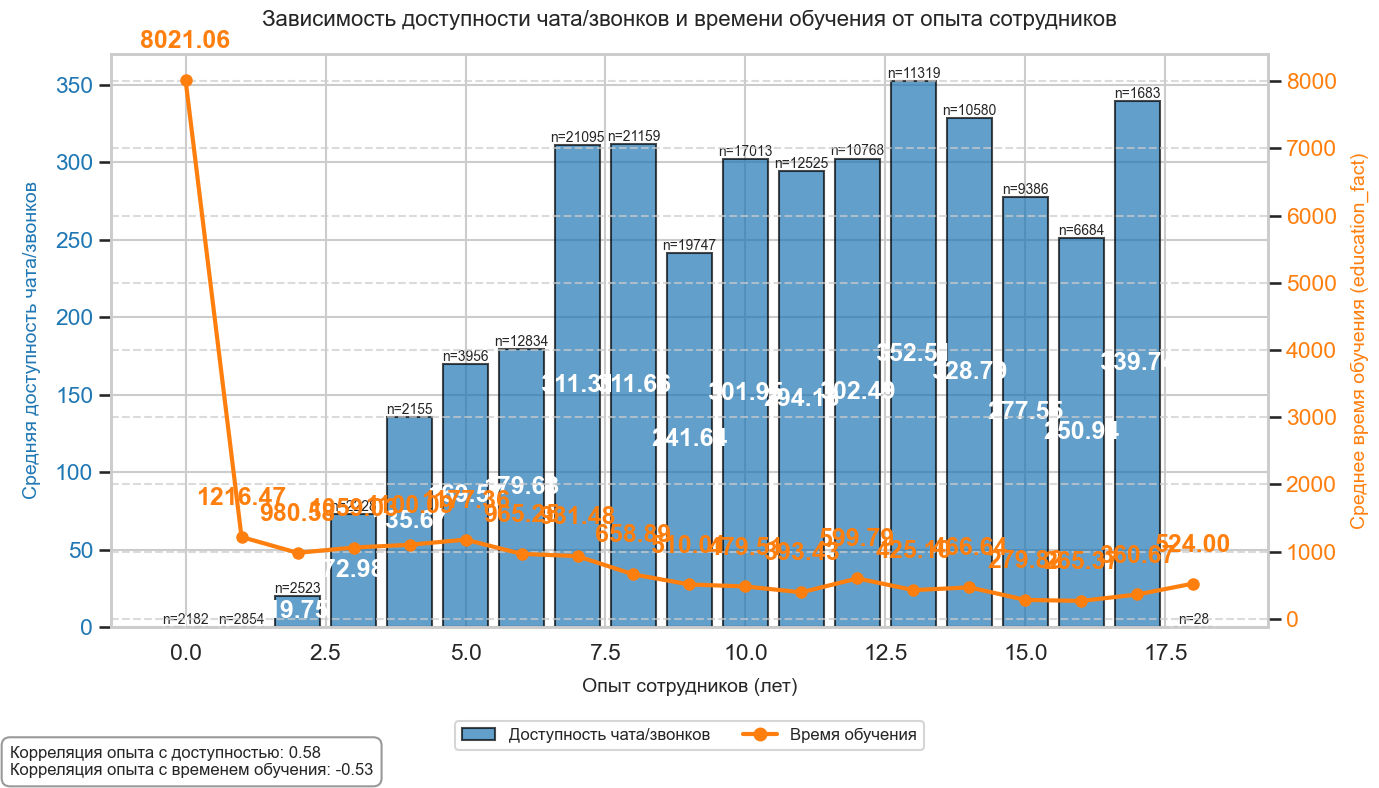

C:\Users\Админ\AppData\Local\Temp\ipykernel_11064\3039146434.py:112: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = plot_df.pivot_table(


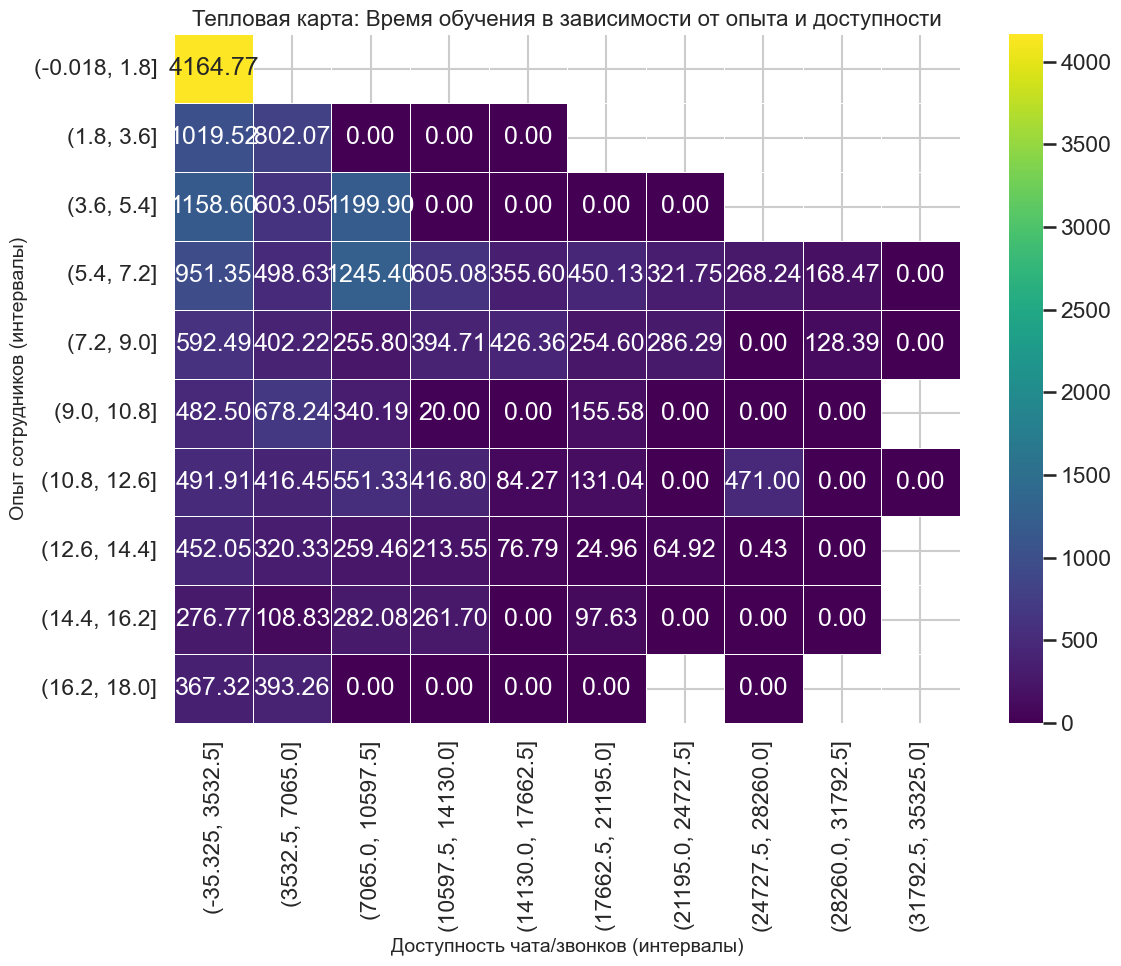

In [ ]:
# Предполагаем, что столбец с временем обучения называется 'training_time'
# Если у вас другое название, замените его в коде
training_column = 'training_time'

# Проверяем наличие столбца с временем обучения
if training_column not in df.columns:
    print(f"Столбец '{training_column}' не найден в DataFrame.")
    print(f"Доступные столбцы: {df.columns.tolist()}")
    # Если столбца нет, попробуем найти похожий по названию
    possible_columns = [col for col in df.columns if 'train' in col.lower() or 'learn' in col.lower() or 'educ' in col.lower()]
    if possible_columns:
        print(f"Возможно, вы имели в виду один из этих столбцов: {possible_columns}")
        training_column = possible_columns[0]  # Берем первый подходящий
        print(f"Используем столбец '{training_column}' для времени обучения")
    else:
        print("Не найдено подходящих столбцов для времени обучения")
        # Создаем случайные данные для демонстрации
        df['training_time'] = np.random.uniform(1, 10, size=len(df))
        training_column = 'training_time'
        print("Созданы случайные данные для демонстрации")

# Удаляем строки с пропущенными значениями для всех трех столбцов
plot_df = df.dropna(subset=['exp_staff', 'avail_chat_call_fact', training_column])
print(f"Количество строк для построения графика: {len(plot_df)}")

# Создаем категории опыта для группировки
plot_df['exp_category'] = plot_df['exp_staff'].round().astype(int)

# Вычисляем средние значения для каждой категории опыта
grouped_data = plot_df.groupby('exp_category').agg({
    'avail_chat_call_fact': ['mean', 'count', 'std'],
    training_column: ['mean', 'std']
}).reset_index()

# Преобразуем мультииндексные столбцы в обычные
grouped_data.columns = ['exp_category', 'avg_availability', 'employees_count', 'std_availability', 
                        'avg_training_time', 'std_training_time']

# Отфильтруем группы с малым количеством сотрудников
min_employees = 3
filtered_data = grouped_data[grouped_data['employees_count'] >= min_employees]

# Создаем график с двумя осями Y
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Основная ось Y для доступности чата/звонков
ax1 = plt.gca()
ax1.set_xlabel('Опыт сотрудников (лет)', fontsize=14, labelpad=10)
ax1.set_ylabel('Средняя доступность чата/звонков', fontsize=14, labelpad=10, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Создаем столбчатую диаграмму для доступности
bars = ax1.bar(filtered_data['exp_category'], filtered_data['avg_availability'], 
               color='#1f77b4', alpha=0.7, edgecolor='black', linewidth=1.5)

# Добавляем значения на столбцы
for bar, value in zip(bars, filtered_data['avg_availability']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height/2,
            f"{value:.2f}", ha='center', va='center', color='white', fontweight='bold')

# Добавляем количество сотрудников над столбцами
for i, count in enumerate(filtered_data['employees_count']):
    ax1.text(i, filtered_data['avg_availability'].iloc[i] + 0.02, 
             f"n={count}", ha='center', va='bottom', fontsize=10)

# Вторая ось Y для времени обучения
ax2 = ax1.twinx()
ax2.set_ylabel(f'Среднее время обучения ({training_column})', fontsize=14, labelpad=10, color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Линия для времени обучения
line = ax2.plot(filtered_data['exp_category'], filtered_data['avg_training_time'], 
                'o-', color='#ff7f0e', linewidth=3, markersize=8, label='Время обучения')

# Добавляем значения времени обучения
for i, value in enumerate(filtered_data['avg_training_time']):
    ax2.text(i, value + 0.05 * max(filtered_data['avg_training_time']), 
             f"{value:.2f}", ha='center', va='bottom', color='#ff7f0e', fontweight='bold')

# Добавляем заголовок
plt.title('Зависимость доступности чата/звонков и времени обучения от опыта сотрудников', 
          fontsize=16, pad=20)

# Добавляем легенду
bars_legend = plt.Rectangle((0, 0), 1, 1, fc='#1f77b4', alpha=0.7, edgecolor='black')
line_legend = plt.Line2D([0], [0], color='#ff7f0e', linewidth=3, marker='o')
ax1.legend([bars_legend, line_legend], ['Доступность чата/звонков', 'Время обучения'], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True, fontsize=12)

# Добавляем информацию о корреляции
corr_availability = np.corrcoef(filtered_data['exp_category'], filtered_data['avg_availability'])[0, 1]
corr_training = np.corrcoef(filtered_data['exp_category'], filtered_data['avg_training_time'])[0, 1]

plt.figtext(0.01, 0.01, 
           f"Корреляция опыта с доступностью: {corr_availability:.2f}\n"
           f"Корреляция опыта с временем обучения: {corr_training:.2f}", 
           fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

# Улучшаем внешний вид
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Показываем график
plt.show()

# Дополнительно: создаем тепловую карту для визуализации взаимосвязи трех переменных
plt.figure(figsize=(12, 10))

# Создаем сетку для тепловой карты
pivot_table = plot_df.pivot_table(
    values=training_column,
    index=pd.cut(plot_df['exp_staff'], bins=10),  # Разбиваем опыт на 10 интервалов
    columns=pd.cut(plot_df['avail_chat_call_fact'], bins=10),  # Разбиваем доступность на 10 интервалов
    aggfunc='mean'
)

# # Строим тепловую карту
# sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
# plt.title('Тепловая карта: Время обучения в зависимости от опыта и доступности', fontsize=16)
# plt.xlabel('Доступность чата/звонков (интервалы)', fontsize=14)
# plt.ylabel('Опыт сотрудников (интервалы)', fontsize=14)
# plt.tight_layout()
plt.show()


